In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("HTRU_2.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
cols = ['Mean of the integrated profile','Standard deviation of the integrated profile',
        'Excess kurtosis of the integrated profile','Skewness of the integrated profile',
        'Mean of the DM-SNR curve','Standard deviation of the DM-SNR curve','Excess kurtosis of the DM-SNR curve',
        'Skewness of the DM-SNR curve','target']

In [ ]:
df = pd.read_csv("HTRU_2.csv", names = cols)
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [ ]:
data = df

Text(0.5, 1.0, 'Proportion of target variable in dataset')

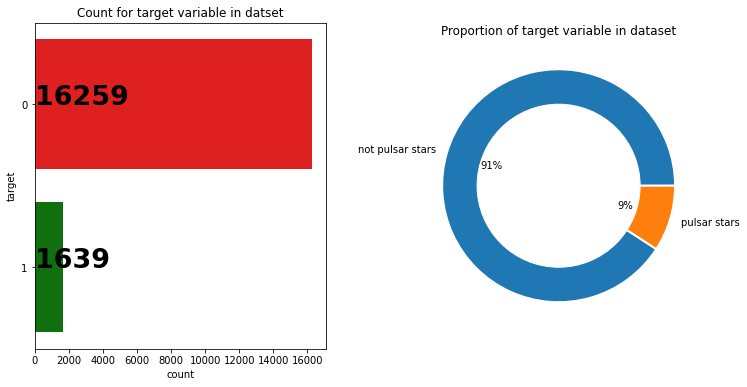

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = data["target"],palette=["r","g"])
for i,j in enumerate(data["target"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target variable in datset")


plt.subplot(122)
plt.pie(data["target"].value_counts().values,labels=["not pulsar stars","pulsar stars"],autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .3)
plt.title("Proportion of target variable in dataset")

Text(0, 0.5, '')

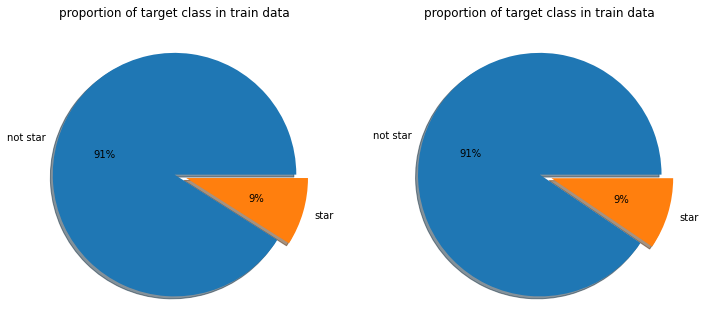

In [ ]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(data,test_size = .3,random_state = 123)

plt.figure(figsize=(12,6))
plt.subplot(121)
train["target"].value_counts().plot.pie(labels = ["not star","star"],autopct = "%1.0f%%",shadow = True,explode=[0,.1])
plt.title("proportion of target class in train data")
plt.ylabel("")
plt.subplot(122)
test["target"].value_counts().plot.pie(labels = ["not star","star"],autopct = "%1.0f%%",shadow = True,explode=[0,.1])
plt.title("proportion of target class in train data")
plt.ylabel("")

In [ ]:
train_X = train[[x for x in train.columns if x not in ["target"]]]
train_Y = train[["target"]]
test_X  = test[[x for x in test.columns if x not in ["target"]]]
test_Y  = test[["target"]]

In [ ]:
# Standardize data
kmeans_01 = data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(kmeans_01) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,0.007918,-0.821685
1,-0.247224,-0.402424


In [ ]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

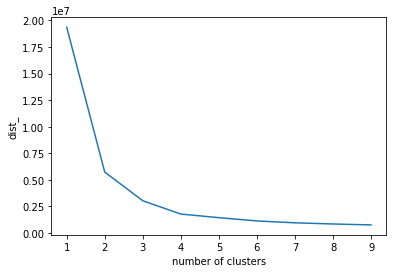

In [ ]:
#Elbow approach
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("number of clusters")
plt.ylabel("dist_")
plt.show()

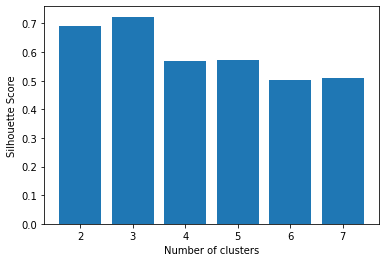

In [ ]:
#silhouette approach
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X)))
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
# Visualizing the clustering 
'''
plt.scatter(X['P1'], X['P2'], c = KMeans(n_clusters = 3).fit_predict(X), cmap =plt.cm.winter) 
plt.show()
'''

"\nplt.scatter(X['P1'], X['P2'], c = KMeans(n_clusters = 3).fit_predict(X), cmap =plt.cm.winter) \nplt.show()\n"

In [ ]:
#normalize the dataset
scaler = StandardScaler()
kmeans_01 = scaler.fit_transform(kmeans_01)

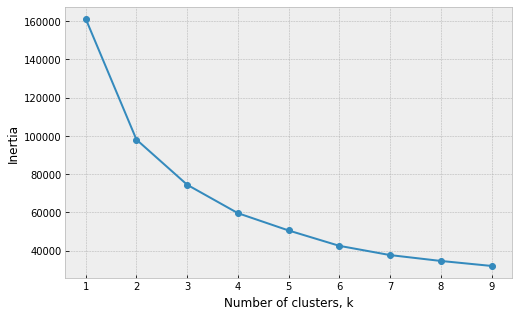

In [ ]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(kmeans_01)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [ ]:
##############################################

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(kmeans_01)
    distortions.append(kmeanModel.inertia_)

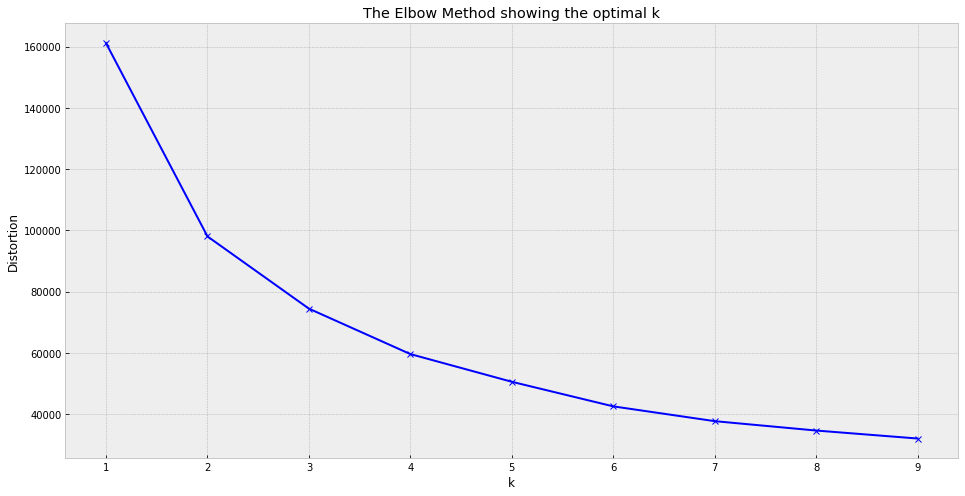

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
'''
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)
df['target'] = y_pred
'''

"\nkmeans = KMeans(n_clusters=3, random_state=42)\ny_pred = kmeans.fit_predict(X)\ndf['target'] = y_pred\n"

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

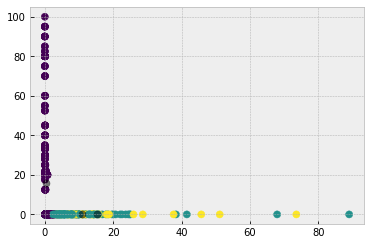

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);

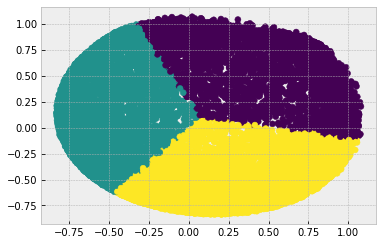

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal)) 
plt.show() 

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_principal)

pred = kmeans.predict(X_principal)

#X_principal = data_cleaned.copy()
X_principal = pred + 1

In [ ]:
#pca

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_principal)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_df["Cluster"] = pred + 1

ValueError: ignored